#  Wafer fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/wafer_data.csv')
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [4]:
print(df.dtypes)

print("###############")

# Check for non-numeric values in numeric columns
print(df.applymap(lambda x: isinstance(x, str)).sum())

Unnamed: 0     object
Sensor-1      float64
Sensor-2      float64
Sensor-3      float64
Sensor-4      float64
               ...   
Sensor-587    float64
Sensor-588    float64
Sensor-589    float64
Sensor-590    float64
Good/Bad        int64
Length: 592, dtype: object
###############
Unnamed: 0    100
Sensor-1        0
Sensor-2        0
Sensor-3        0
Sensor-4        0
             ... 
Sensor-587      0
Sensor-588      0
Sensor-589      0
Sensor-590      0
Good/Bad        0
Length: 592, dtype: int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [4]:
df.shape

(100, 592)

In [5]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [6]:
df.columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [7]:
df.drop(columns = ['Unnamed: 0', 'Good/Bad']).iloc[:100].to_csv('data/wafer_final.csv', index = False)

In [8]:
# Rename the column, 'Unnamed:' 0 to 'wafer_id'

df.rename(columns = {'Unnamed: 0': 'wafer_id'}, inplace = True)

In [9]:
df.head()

,wafer_id,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


## Checking for null values

In [10]:
df.isna().sum()

wafer_id      0
Sensor-1      1
Sensor-2      0
Sensor-3      3
Sensor-4      3
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

In [11]:
df.shape

(100, 592)

In [12]:
# Percentage of missing values

rows = df.shape[0]
cols = df.shape[1] - 1  # Ignoring wafer_id column here

df.isna().sum().sum() / (rows * cols)

np.float64(0.03901861252115059)

Insight: Only 3.90 % of data is missing in our dataset. It means that 4% of the total cells we are having are missing.

So, we will try all sort of Imputation strategies and will choose which gives us least overall error value.

## Checking for balance in dataset

In [13]:
df['Good/Bad'].value_counts()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64

Insight: This is highly imbalanced dataset, so we need to do Resampling.

## Checking for outliers

<Axes: >

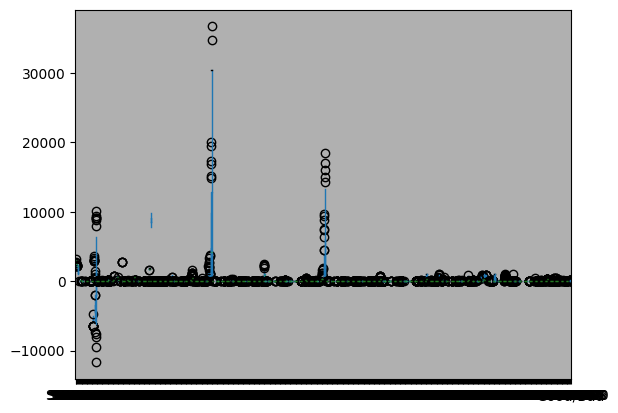

In [14]:
df.boxplot()

Insight: We can see that some features has pretty bad outliers. So, we need to do Standarization.

# Visualization of Sensors' distribution

Lets have a look at the distribution of the first 50 sensors in the wafer.

In [15]:
plt.figure(figsize=(15, 100))

for i, col in enumerate(df.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.displot(x=df[col], color='blue')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Let's check for 50 random sensors

In [16]:
# Selecting 50 random sensors, selecting their indices

import random

# Get 50 unique random numbers between 1 and 590
rand_sensors_ind = random.sample(range(1, 591), 50)

print(rand_sensors_ind)


[229, 321, 363, 56, 62, 176, 345, 55, 391, 370, 259, 351, 19, 405, 206, 209, 37, 215, 299, 155, 466, 497, 330, 324, 522, 300, 121, 483, 340, 534, 426, 479, 274, 423, 14, 416, 51, 276, 265, 107, 232, 556, 190, 436, 548, 437, 82, 350, 359, 166]


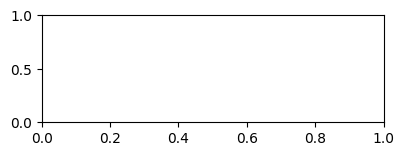

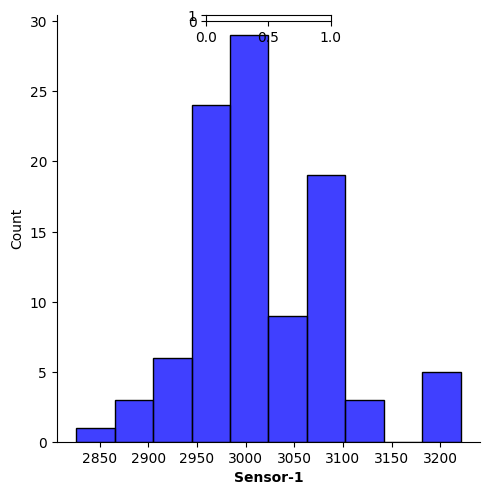

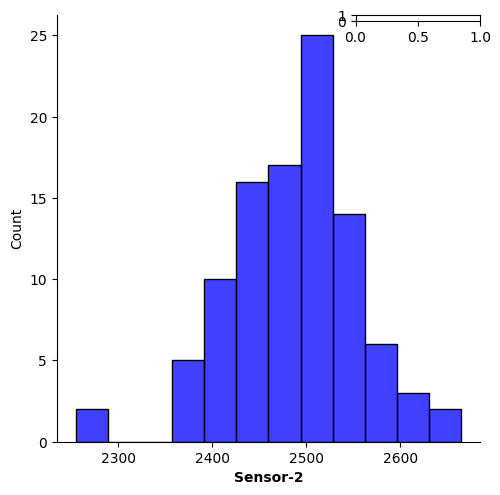

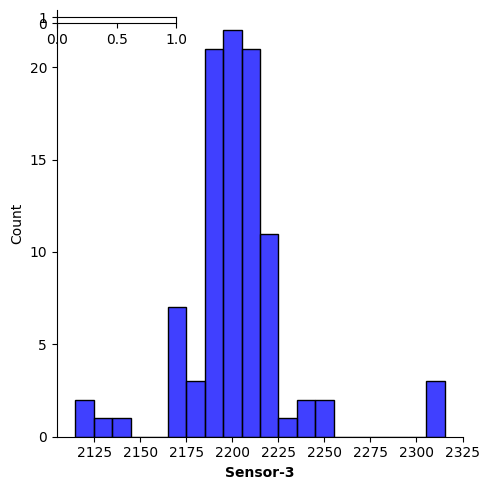

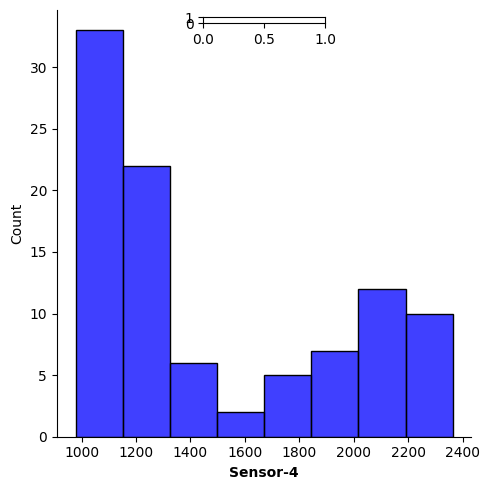

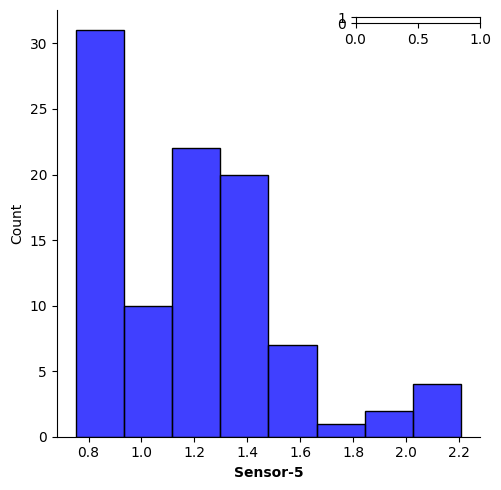

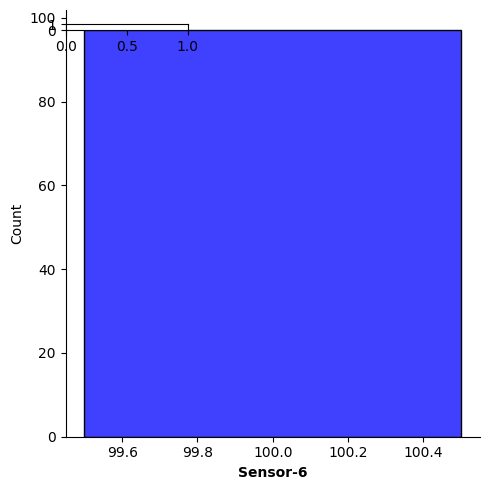

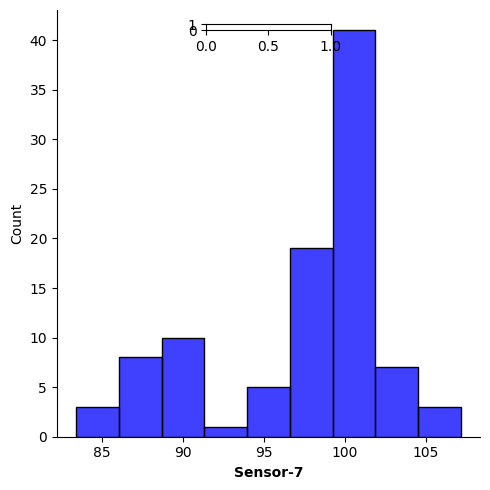

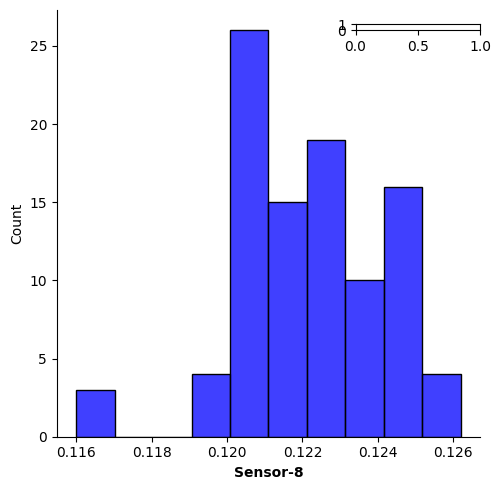

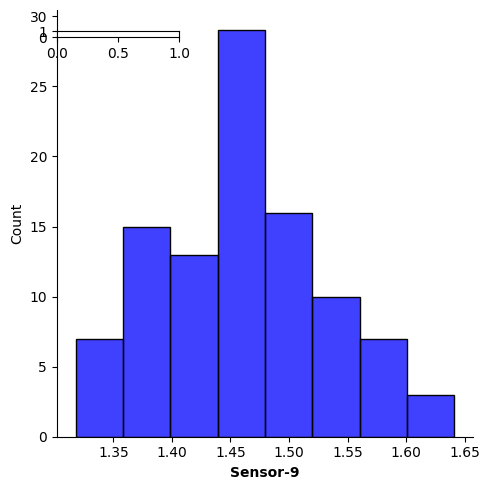

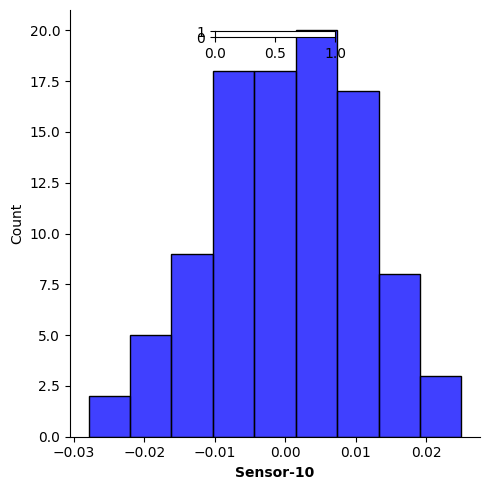

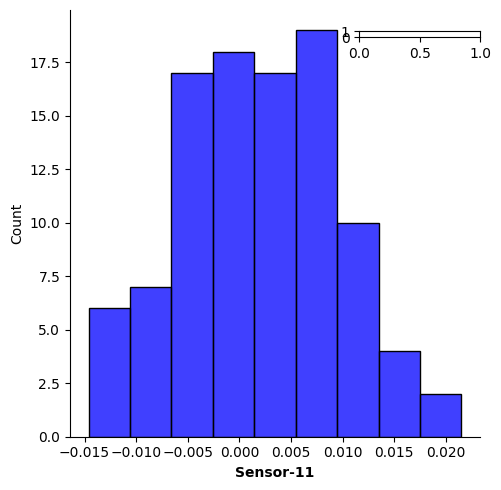

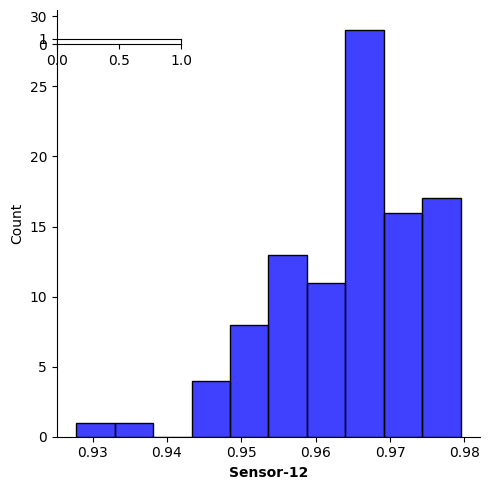

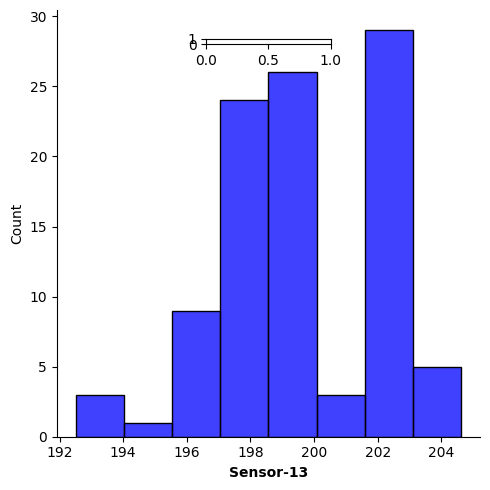

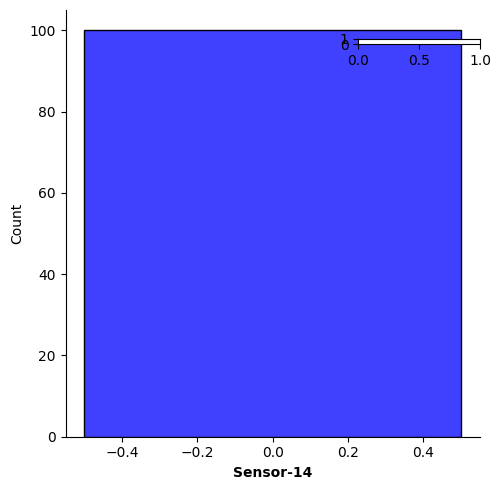

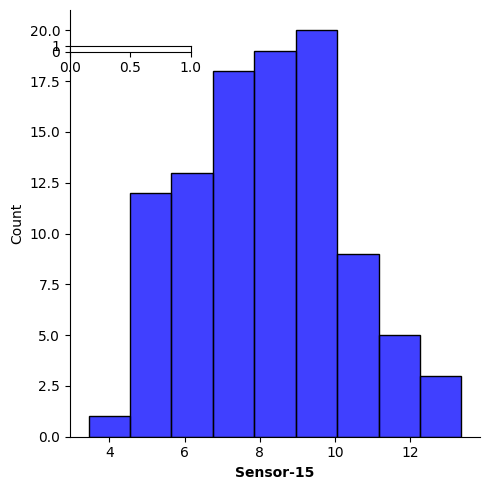

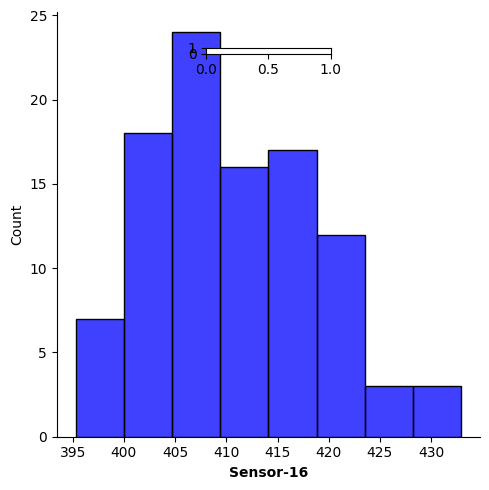

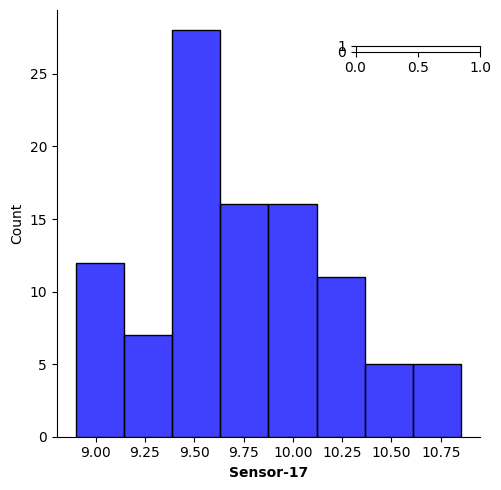

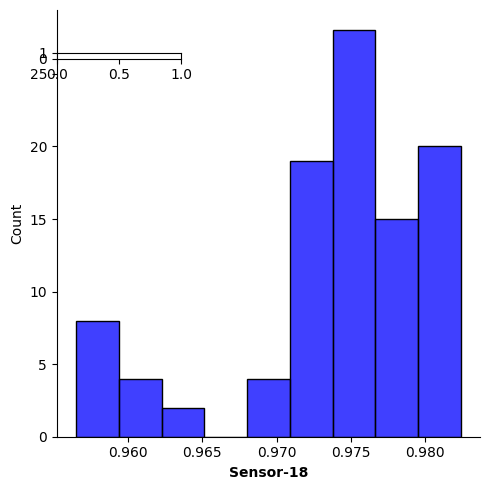

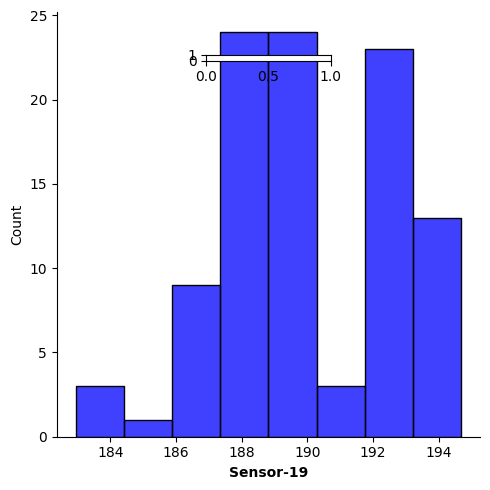

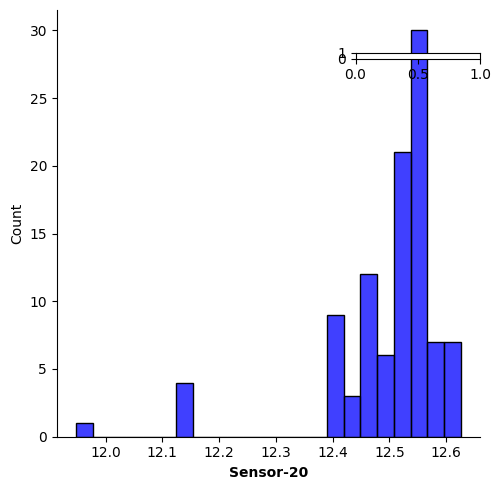

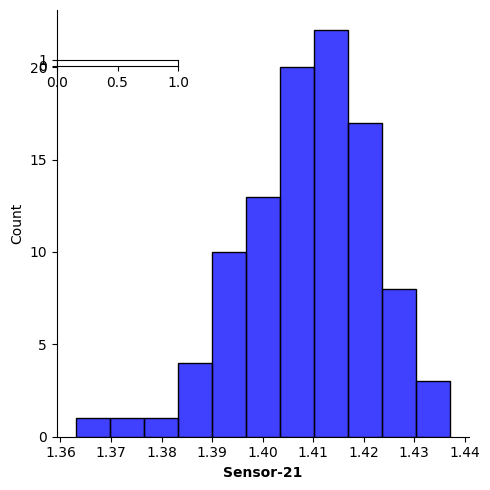

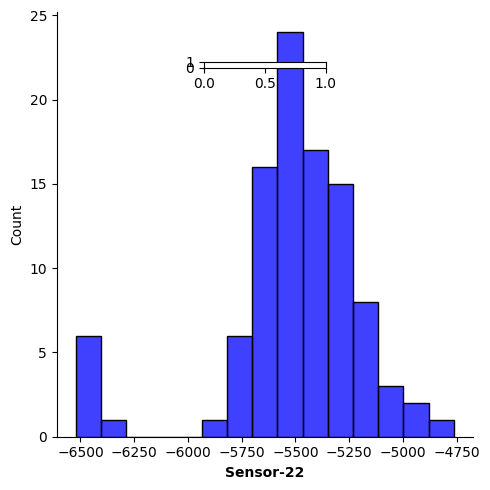

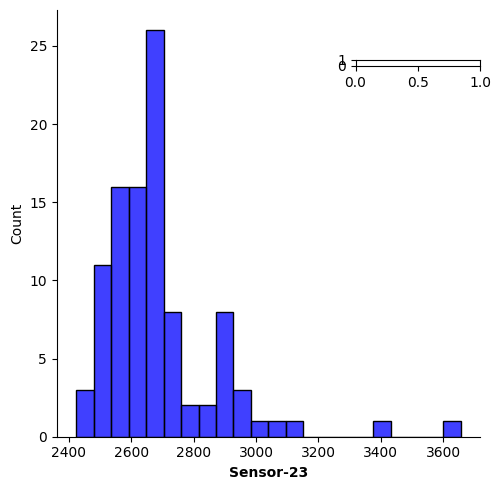

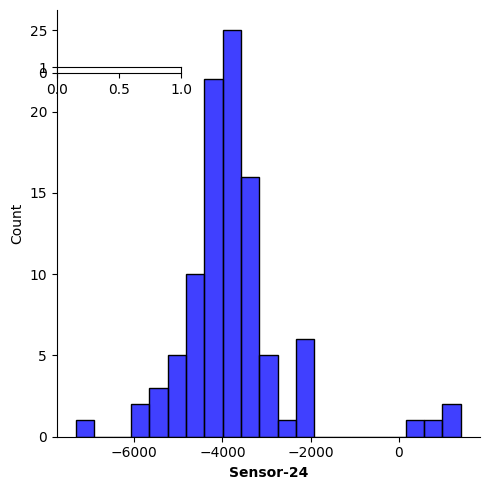

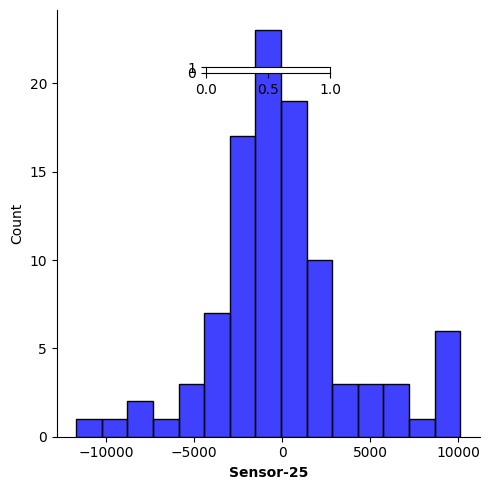

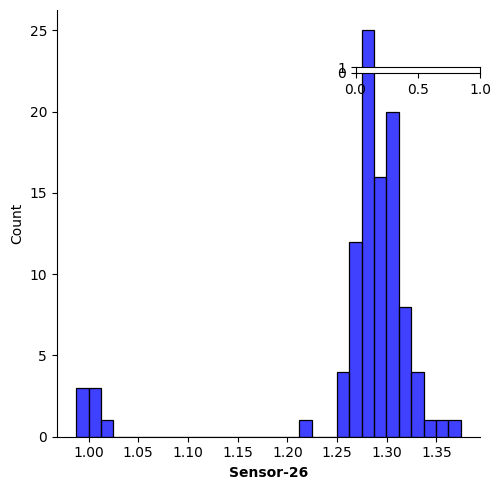

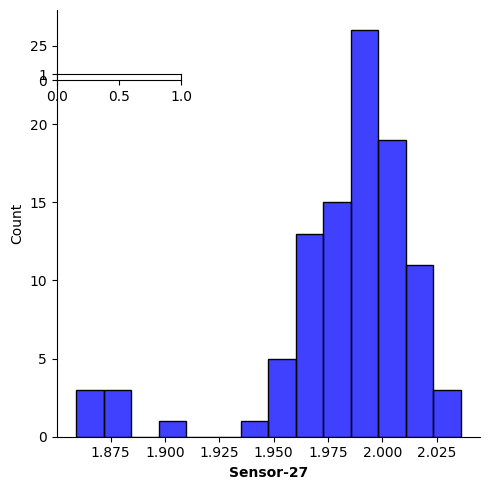

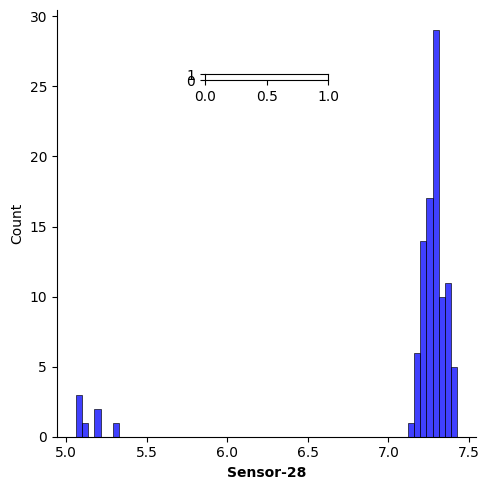

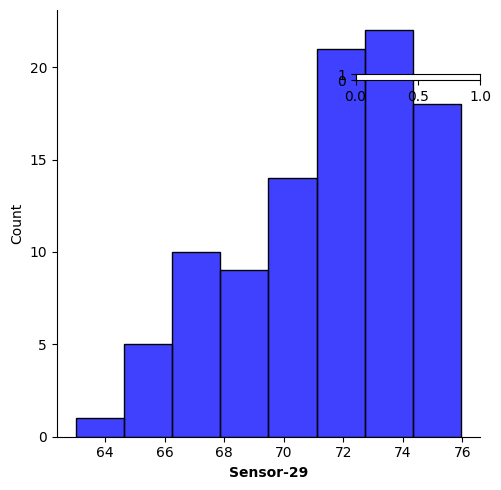

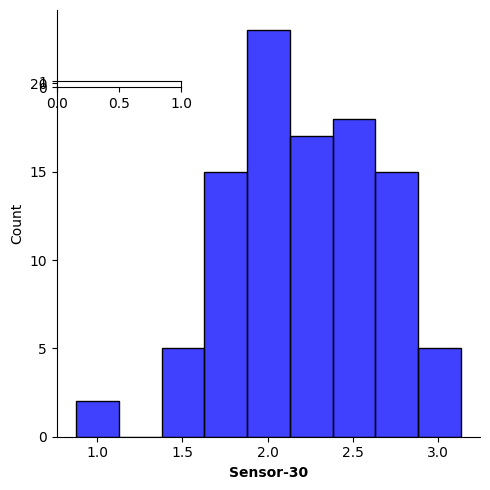

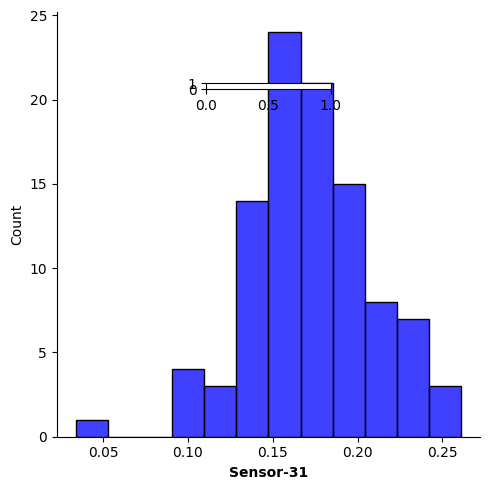

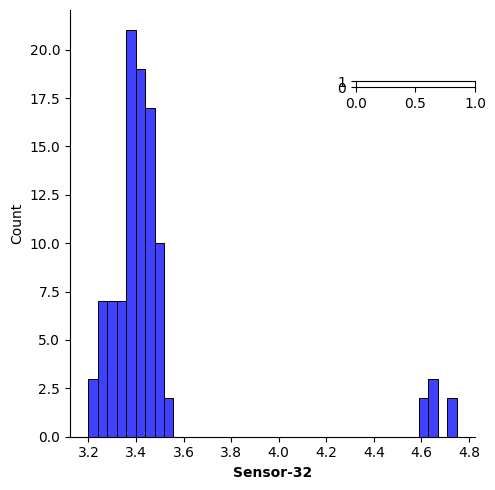

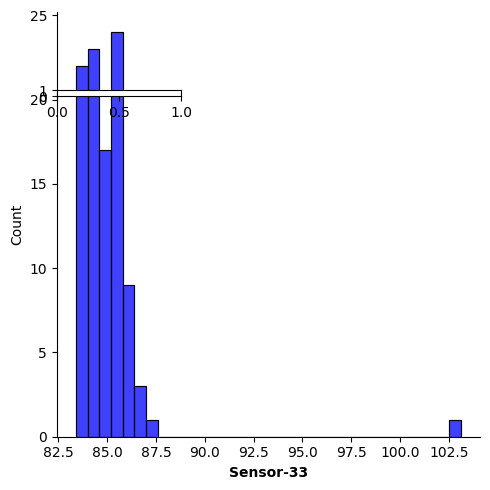

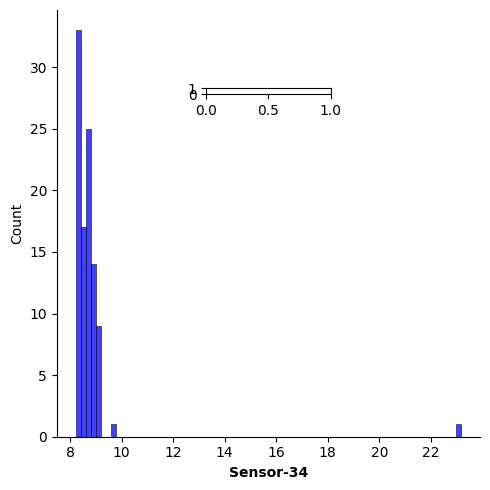

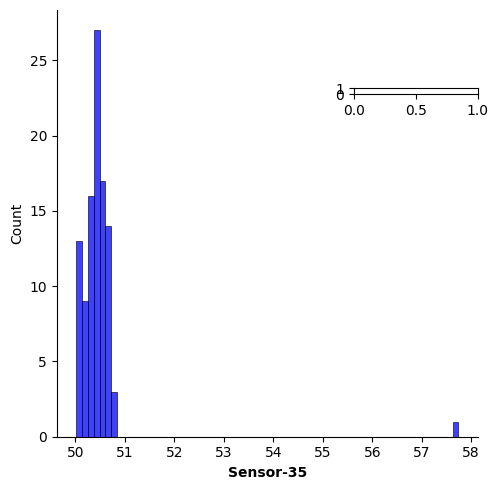

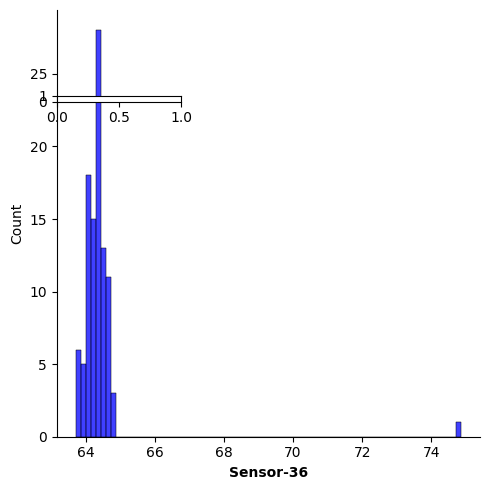

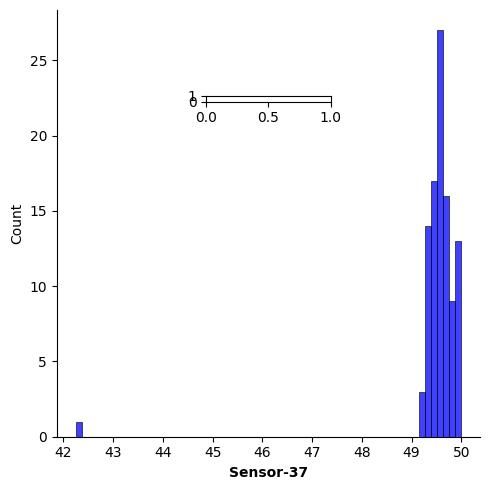

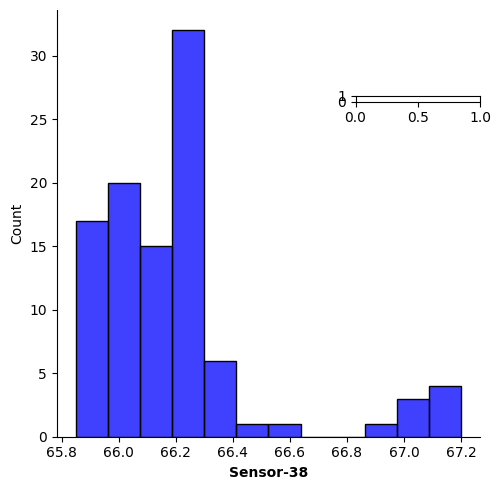

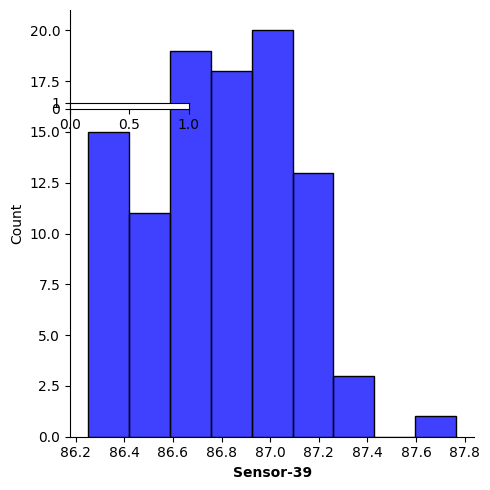

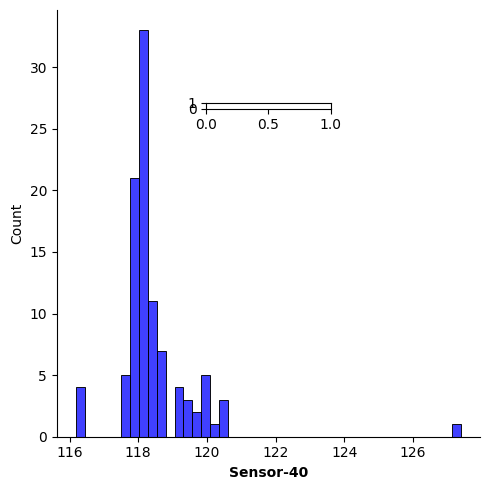

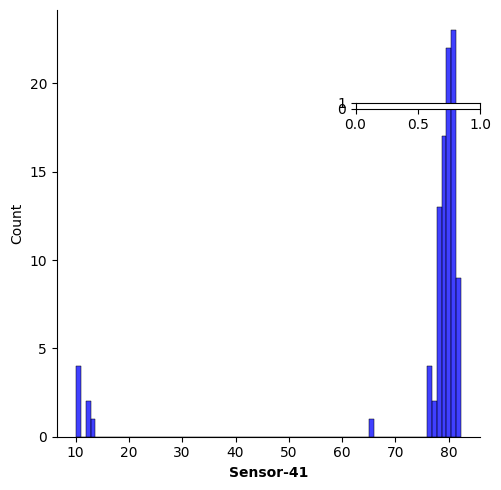

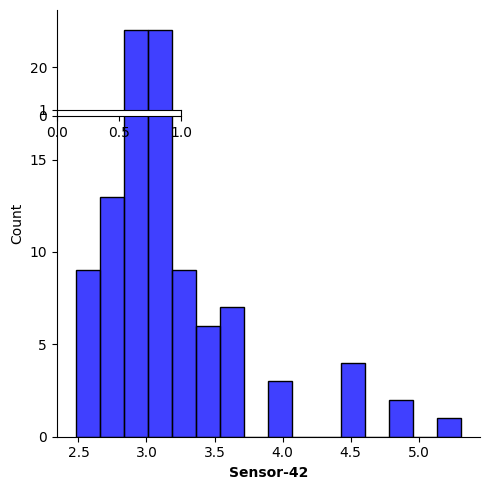

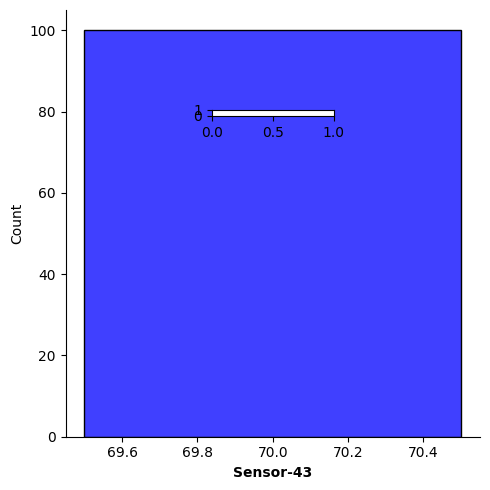

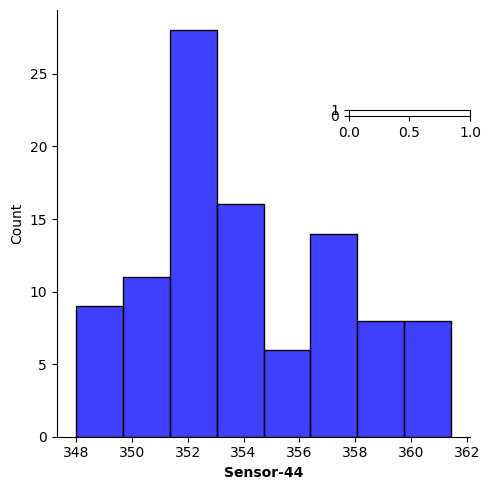

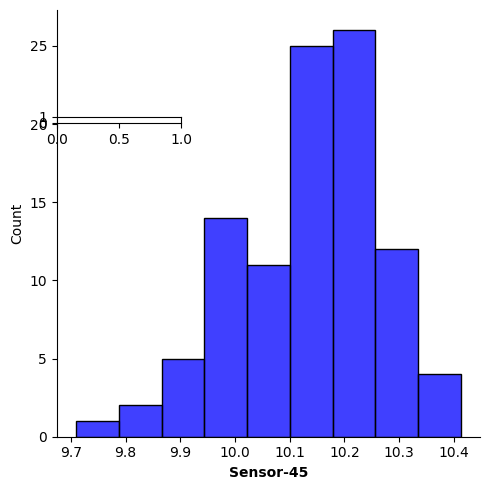

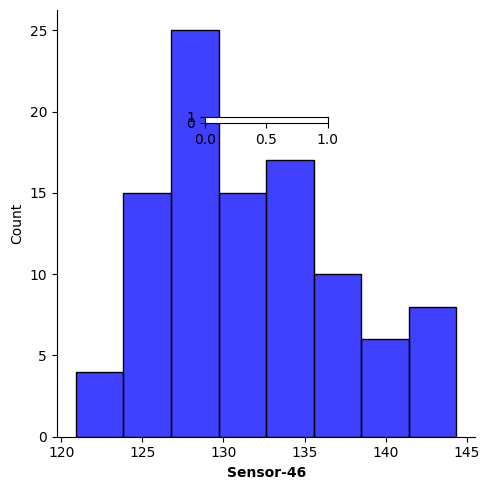

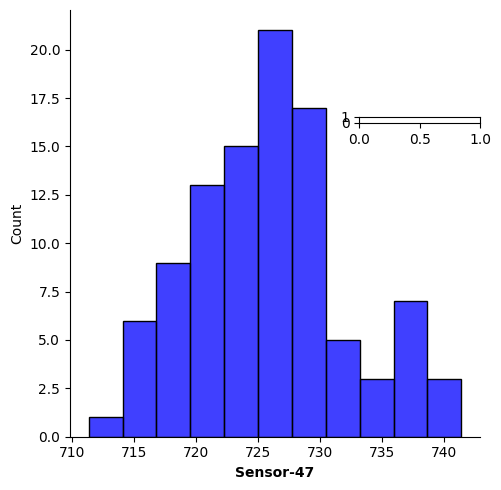

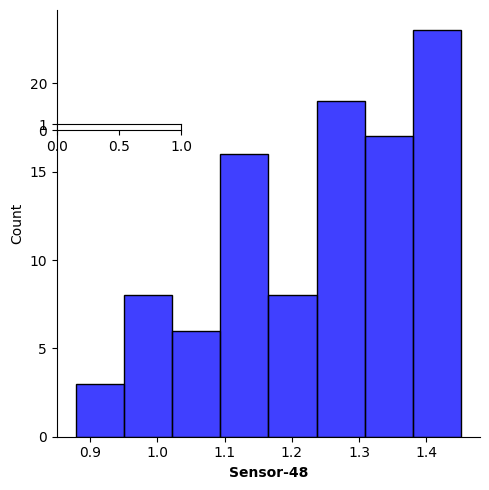

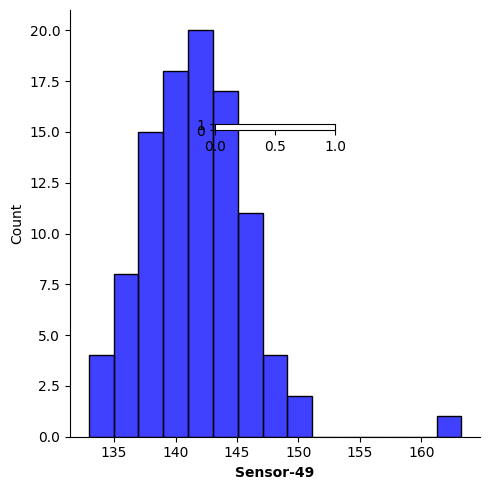

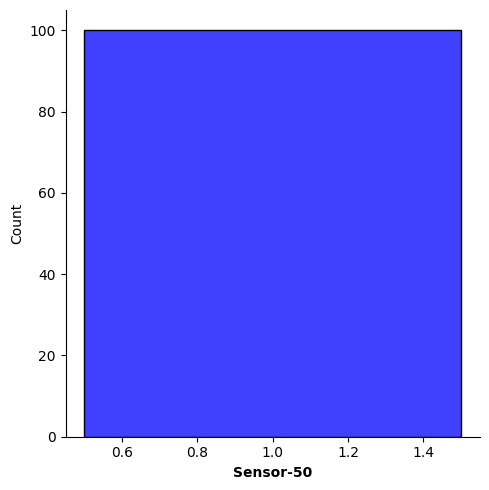

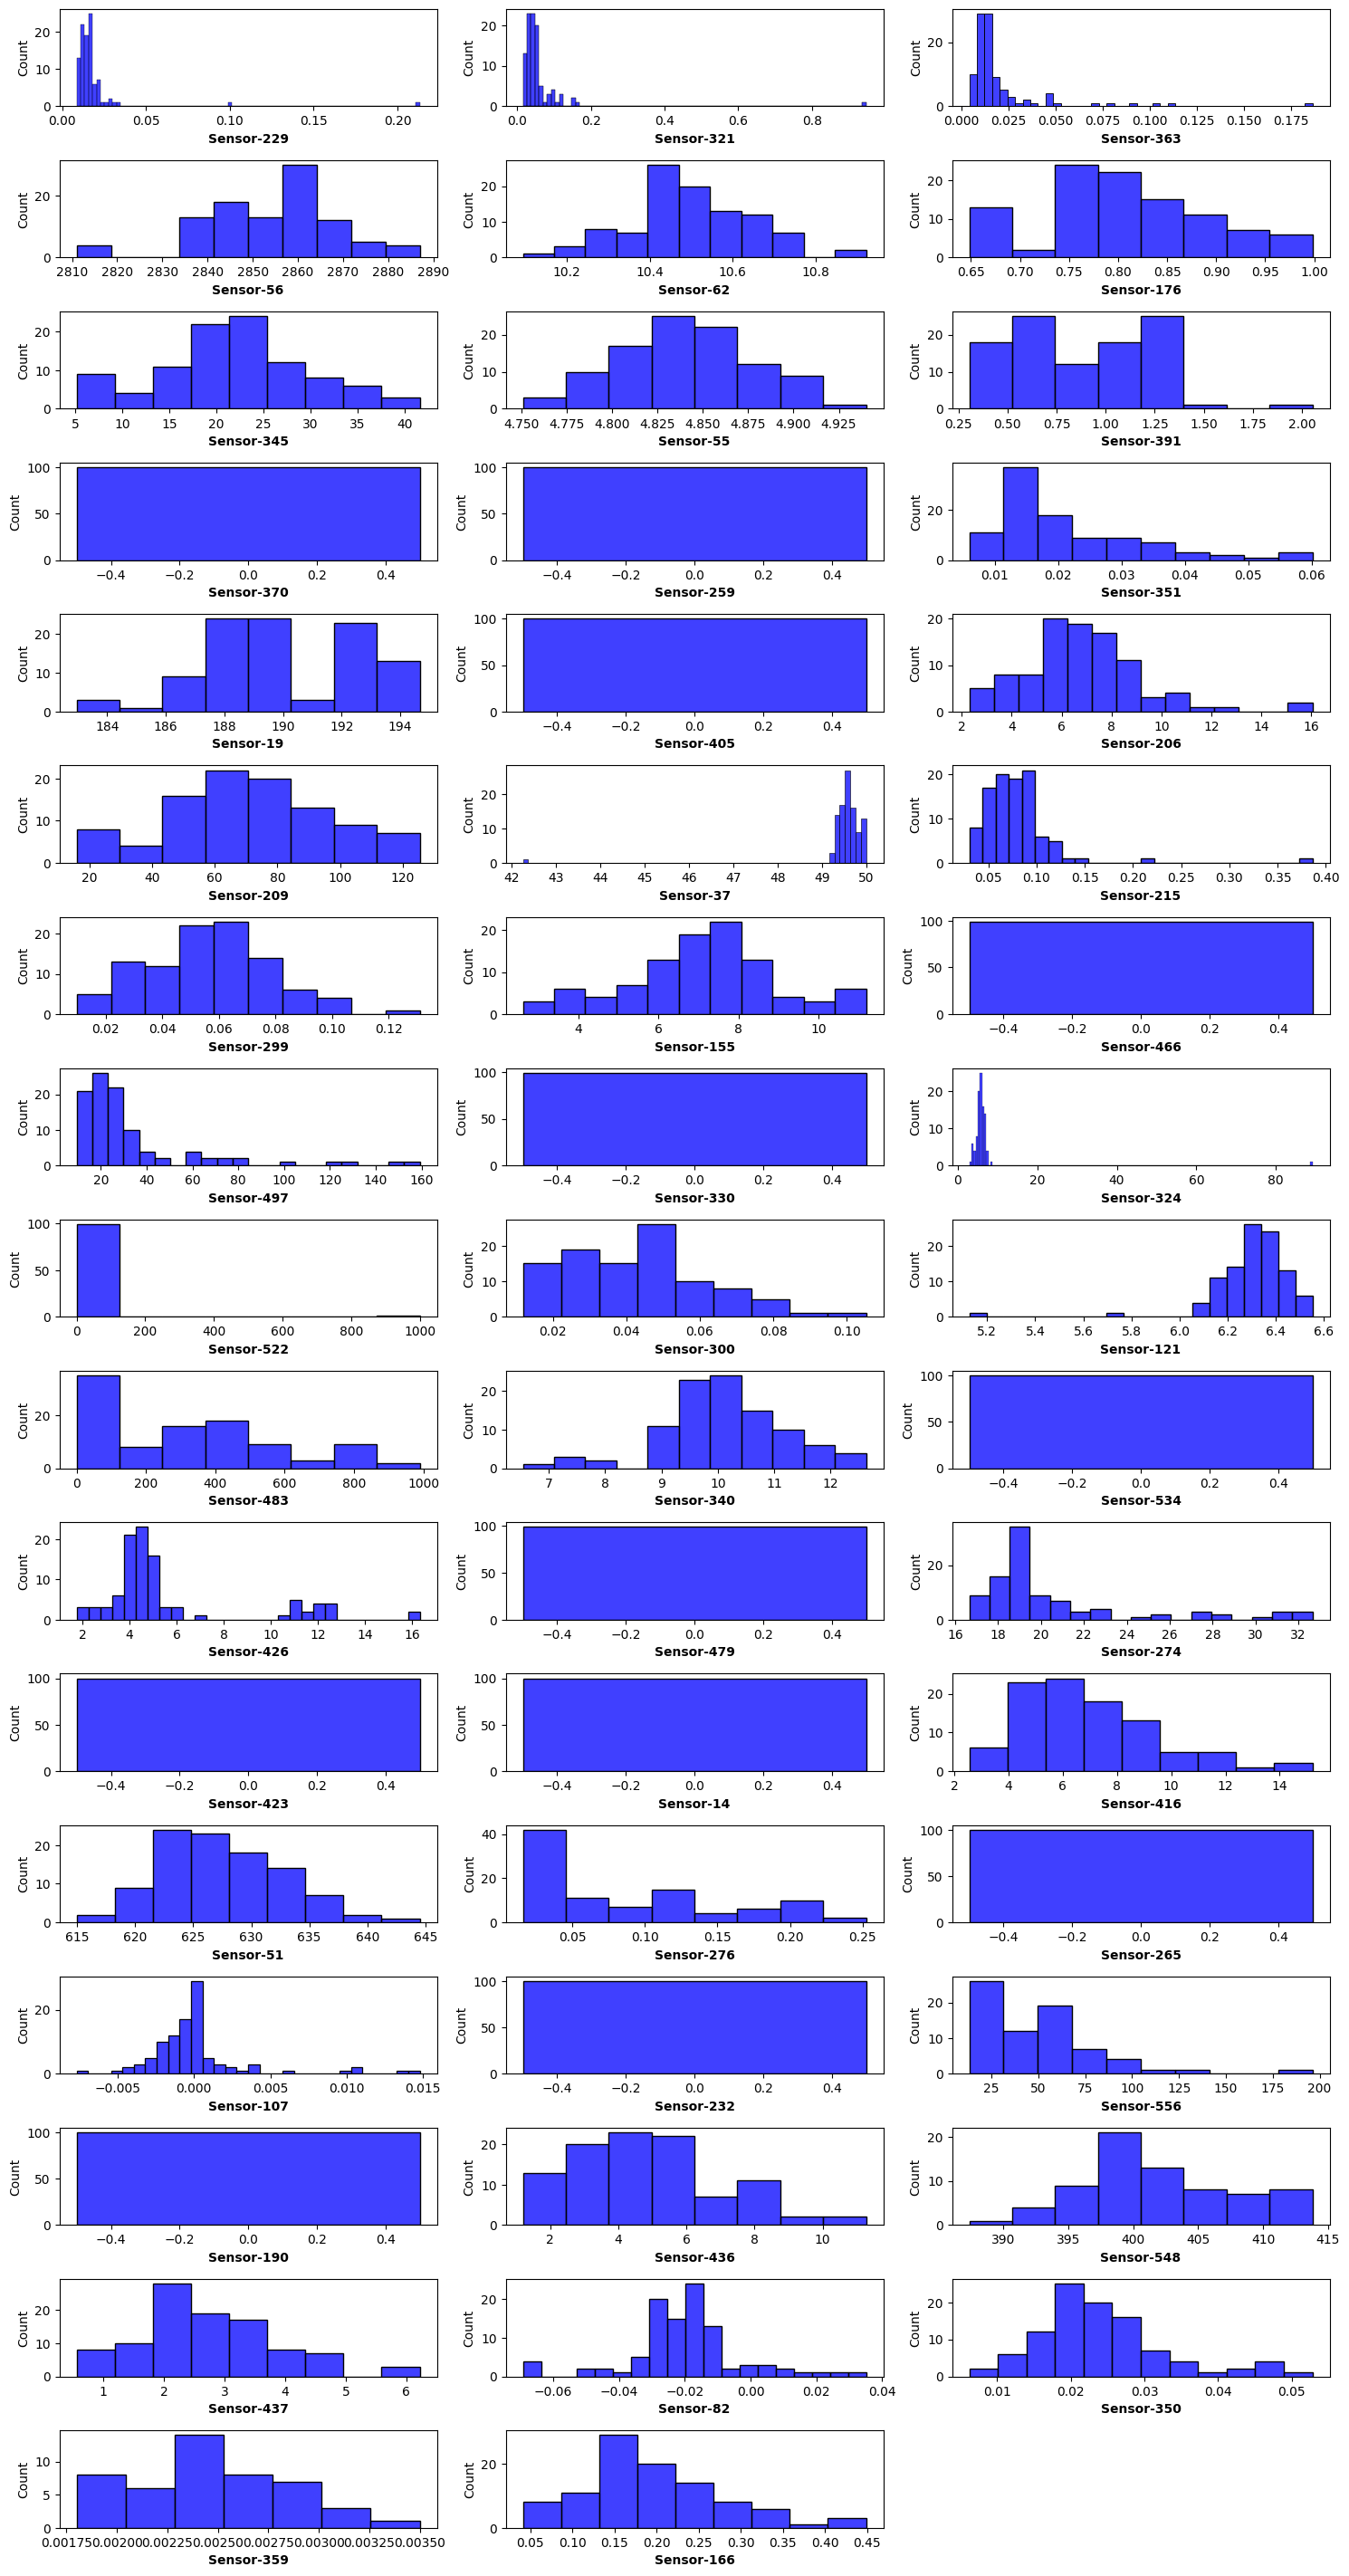

In [17]:
plt.figure(figsize = (15,100))

for i, col in enumerate(df.columns[rand_sensors_ind]):
    plt.subplot(60, 3, i+1)
    sns.histplot(x = df[col], color = 'blue')
    plt.xlabel(col, weight = 'bold')
    plt.tight_layout()

plt.show()

We can't deal with each 590 columns separately, so we implement scaling.

## Handling columns - 

a.) For features/columns with **0 standard deviation**, we will drop them as they are same for all wafer.

b.) For features/ Columns having **outliers**, we will apply **Robust scaling**.

In [18]:
df.isna().sum().div(df.shape[0])

wafer_id      0.00
Sensor-1      0.01
Sensor-2      0.00
Sensor-3      0.03
Sensor-4      0.03
              ... 
Sensor-587    0.00
Sensor-588    0.00
Sensor-589    0.00
Sensor-590    0.00
Good/Bad      0.00
Length: 592, dtype: float64

In [19]:
# a.) Dropping columns with 0 std as they are not affecting the target variable in any way.

def get_zeroStd_columns(df:pd.DataFrame):

    '''Returns the list of columns having 0 standard deviation'''

    cols_to_drop = []
    numerical_cols = [col for col in df.columns if df[col].dtype != 'O']

    for col in numerical_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)

    return cols_to_drop


# b.) Dropping columns with nissing values ration more than the given threshold
def get_RedundantColumns(df:pd.DataFrame, miss_threshold):
    ''' Returns the list of columns having missing values more than the threshold value'''

    cols_miss_ratios = df.isna().sum().div(df.shape[0])

    cols_to_drop = list(cols_miss_ratios[ cols_miss_ratios> miss_threshold].index)
    
    return cols_to_drop



In [20]:
cols_to_drop1 = get_zeroStd_columns(df)

cols_to_drop2 = get_RedundantColumns(df, 0.7)

print("cols_to_drop1: \n", cols_to_drop1)
print("\ncols_to_drop2: \n", cols_to_drop2)

cols_to_drop1: 
 ['Sensor-6', 'Sensor-14', 'Sensor-43', 'Sensor-50', 'Sensor-53', 'Sensor-70', 'Sensor-75', 'Sensor-98', 'Sensor-142', 'Sensor-150', 'Sensor-179', 'Sensor-180', 'Sensor-187', 'Sensor-190', 'Sensor-191', 'Sensor-192', 'Sensor-193', 'Sensor-194', 'Sensor-195', 'Sensor-207', 'Sensor-210', 'Sensor-227', 'Sensor-230', 'Sensor-231', 'Sensor-232', 'Sensor-233', 'Sensor-234', 'Sensor-235', 'Sensor-236', 'Sensor-237', 'Sensor-238', 'Sensor-241', 'Sensor-242', 'Sensor-243', 'Sensor-244', 'Sensor-257', 'Sensor-258', 'Sensor-259', 'Sensor-260', 'Sensor-261', 'Sensor-262', 'Sensor-263', 'Sensor-264', 'Sensor-265', 'Sensor-266', 'Sensor-267', 'Sensor-277', 'Sensor-285', 'Sensor-314', 'Sensor-315', 'Sensor-316', 'Sensor-323', 'Sensor-326', 'Sensor-327', 'Sensor-328', 'Sensor-329', 'Sensor-330', 'Sensor-331', 'Sensor-343', 'Sensor-348', 'Sensor-365', 'Sensor-370', 'Sensor-371', 'Sensor-372', 'Sensor-373', 'Sensor-374', 'Sensor-375', 'Sensor-376', 'Sensor-379', 'Sensor-380', 'Sensor-381

In [21]:
# Features which are not contributing to ML algorithm

total_cols_to_drop = cols_to_drop1 + cols_to_drop2 + ['wafer_id']
total_cols_to_drop

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [22]:
len(total_cols_to_drop)

127

### Segregating independent and dependent features

In [23]:
x, y = df.drop(total_cols_to_drop, axis = 1), df['Good/Bad']

In [24]:
x.shape, y.shape

((100, 465), (100,))

## Data Transformation

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler

In [26]:
imputer = KNNImputer(n_neighbors=3)

preprocessing_pipeline = Pipeline(
    steps=[
        ('Imputer', imputer),
        ('Scaler', RobustScaler())
    ]
)

preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [27]:
x_transformed = preprocessing_pipeline.fit_transform(x)

x_transformed

array([[-0.37110152, -0.21388855,  0.67805794, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       [-0.44644841,  0.15494872, -1.32959552, ...,  0.515625  ,
        -0.40093   ,  2.        ],
       [ 0.70070541,  0.08389967,  0.20530751, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.671875  ,
        -0.44021198,  2.        ]], shape=(100, 465))

## Shall we cluster wafers instances?

Let's see whether clustering of data instances will do us any good?

In [28]:
%pip install kneed 

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass

In [30]:
@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """

    X: np.array
    desc: str

    def get_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(f'Getting ideal no. of clusters"{self.desc} set" into')

            print("Compute WCSS for shortlisted no. of clusters")
            wcss = []  # Within summation of squares

            for i in range(1,11):
                kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            
            print("WCSS completed successfully for all shortlisted no. of clusters")
            print("Finding the ideal no. of clusters(by locating the dispersal point) via Elbow method")

            knee_finder = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
            print(f"Ideal no. of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            
        except Exception as e:
            print(e)
            raise e
        

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self.get_clusters()
            
            print(f"Dividing the \"{self.desc}\" instances into {ideal_clusters} cluster via KMeans clustering algorithm")
            
            kmeans = KMeans(n_clusters=ideal_clusters, init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            
            print(f"said data instances divided into {ideal_clusters} clusters successfully")

            return kmeans, np.c_[self.X, y_kmeans] 
        
        except Exception as e:
            print(e)
            raise e
        


In [31]:
# Cluster wafer instances

cluster_wafers = ClusterDataInstances(X= x_transformed, desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting ideal no. of clusters"wafers features set" into
Compute WCSS for shortlisted no. of clusters
WCSS for n_clusters=1: 1503049.6472606934
WCSS for n_clusters=2: 512194.0849012661
WCSS for n_clusters=3: 185195.115933283
WCSS for n_clusters=4: 150684.64694542703
WCSS for n_clusters=5: 141667.26511610913
WCSS for n_clusters=6: 121278.90835157088
WCSS for n_clusters=7: 87206.6602739268
WCSS for n_clusters=8: 74740.99623146676
WCSS for n_clusters=9: 71887.84429004947
WCSS for n_clusters=10: 70751.52509366925
WCSS completed successfully for all shortlisted no. of clusters
Finding the ideal no. of clusters(by locating the dispersal point) via Elbow method
Ideal no. of clusters to be formed: 3
Dividing the "wafers features" instances into 3 cluster via KMeans clustering algorithm
said data instances divided into 3 clusters successfully


array([[-0.37110152, -0.21388855,  0.67805794, ..., -0.40093   ,
         0.        ,  0.        ],
       [-0.44644841,  0.15494872, -1.32959552, ..., -0.40093   ,
         2.        ,  0.        ],
       [ 0.70070541,  0.08389967,  0.20530751, ..., -0.40093   ,
         0.        ,  0.        ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.44021198,
         0.        ,  0.        ],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.44021198,
         0.        ,  0.        ],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.44021198,
         2.        ,  0.        ]], shape=(100, 466))

In [32]:
# How many clusters are formed?

np.unique(X_clus[:, -1])

array([0., 1., 2.])

Insight: The dataset was divided into 3 optimal clusters. Let's have a look at their shapes.

In [33]:
# Configure "Clustered" array along with target features.
wafer_clus = np.c_[X_clus, y]

In [34]:
# Distribution of datapoints in these 3 clusters are as:

# Cluster1 data
wafer_1 = wafer_clus[wafer_clus[:,-2] == 0 ]
print("wafer_1.shape: ", wafer_1.shape)

# Cluster2 data
wafer_2 = wafer_clus[wafer_clus[:,-2] == 1 ]
print("wafer_2.sh: ", wafer_2.shape)

# Cluster3 data
wafer_3 = wafer_clus[wafer_clus[:,-2] == 2 ]
print("wafer_3.shape: ", wafer_3.shape)

wafer_1.shape:  (96, 467)
wafer_2.sh:  (1, 467)
wafer_3.shape:  (3, 467)


Insight: As we can see majority of datapoints lie in first cluster itself, so clustering is not a good idea here.

# Resampling of training instances:

Resampling is imperative in this case as the dataset/target varaible is highly imbalanced.

In [35]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
from imblearn.combine import SMOTETomek

X, y = x_transformed[:, :-1], y

resampler = SMOTETomek(sampling_strategy= "auto")
X_res, y_res = resampler.fit_resample(X, y)

In [37]:
X_res.shape, y_res.shape

((188, 464), (188,))

In [38]:
print("Shape of training instances: ")
print("\n Before resampling: ", np.c_[X, y].shape)
print("\n After resampling: ", np.c_[X_res, y_res].shape)


Shape of training instances: 

 Before resampling:  (100, 465)

 After resampling:  (188, 465)


In [39]:
len(y_res[y_res == -1])

94

In [40]:
# Target categories after resampling

print("Unique values in target variable-> ", np.unique(y_res))
print(f"Value counts-> -1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")


Unique values in target variable->  [-1  1]
Value counts-> -1: 94, 1: 94


## Following General steps:

### Train-test split

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.33, random_state = 42)

In [42]:
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)

print("\nx_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)

x_train.shape (125, 464)
y_train.shape (125,)

x_test.shape (63, 464)
y_test.shape (63,)


## Model Selection and model Training

In [43]:
%pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score

In [45]:
# Shortlisted base models

svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel = 'rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')

In [46]:
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("standard deviation: ", scores.std())

## Evaluating 3 types of Kernels here:

1.) linear

2.) rbf

3.) randomforest

### Evaluating SVC(kernel='linear') using cross-validation

In [47]:
svc_score = cross_val_score(svc_clf, x_train, y_train, scoring = 'roc_auc', cv = 10, verbose = 2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [48]:
# Function written above to print scores for the SVC instance

display_scores(svc_score)

scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean:  1.0
standard deviation:  0.0


In [49]:
# Predictions using Cross validation

svc_pred = cross_val_predict(svc_clf, x_test, y_test, cv = 5)

# AUC score
svc_auc = roc_auc_score(y_test, svc_pred)
svc_auc

np.float64(0.9558823529411764)

### Evaluating SVC(kernel = 'rbf) using cross-validation:

In [50]:
# SVC rbf score

svc_rbf_score = cross_val_score(svc_rbf_clf, x_train, y_train, scoring = 'roc_auc', cv=10, verbose =2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [51]:
display_scores(svc_rbf_score)

scores:  [1.         0.97619048 1.         1.         0.97619048 1.
 1.         0.91666667 0.97222222 1.        ]
mean:  0.9841269841269842
standard deviation:  0.02516010711769419


In [52]:
svc_rbf_pred = cross_val_predict(svc_rbf_clf, x_test, y_test, cv=5)

# AUC score
svc_rbf_auc = roc_auc_score(y_test, svc_rbf_pred)
svc_rbf_auc

np.float64(0.9852941176470588)

### Evaluating RandomForestClassifier using Cross validation:

In [53]:
random_clf_scores = cross_val_score(random_clf, x_train, y_train,scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


In [54]:
display_scores(random_clf_scores)

scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean:  1.0
standard deviation:  3.510833468576701e-17


In [55]:
random_clf_pred = cross_val_predict(random_clf, x_test, y_test, cv= 5)

# AUC score
random_clf_auc = roc_auc_score(y_test, random_clf_pred)
random_clf_auc

np.float64(0.9827586206896552)